Задание 5. Предварительная обработка данных

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 3. 

Шаг 2. Выполните предварительную обработку данных (очистку данных) предложенного датасета.  (Алгоритм выполнения представлен в практическом занятии по теме 3.3).

2.1 Загрузите исходные данные;

2.2 Изучите типы данных, наличие пропущенных значений, дублирующихся записей (признаков); 

2.3 Изучите описательные статистики признаков. Выделите признаки, требующие, по Вашему мнению, предварительной обработки;

2.4 Для выделенных признаков выполните предварительную обработку (по необходимости): корректировка типов данных; работа с дублями, поиск и обработка аномальных значений, восстановление пропусков.  

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin.

Описание данных 

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- debt — имел ли задолженность по возврату кредитов

In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('tableau-colorblind10')

In [3]:

df = pd.read_csv('/content/clients_bank.csv') 
                 
df


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,-258.512983,31,Высшее,0,женат / замужем,0,M,0
1,0,-2639.860463,49,СРЕДНЕЕ,1,женат / замужем,0,F,0
2,2,-109.049887,40,Среднее,1,женат / замужем,0,M,0
3,0,NaN,57,среднее,1,вдовец / вдова,2,F,0
4,0,-1309.319009,57,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
995,0,-1338.551665,54,среднее,1,женат / замужем,0,F,0
996,1,-547.578788,56,СРЕДНЕЕ,1,вдовец / вдова,2,F,0
997,0,-1571.110444,50,среднее,1,в разводе,3,F,0
998,0,340176.954536,62,среднее,1,женат / замужем,0,F,0


In [4]:
# просмотр значений для поиска 
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt
count,1000.000000,895.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.472000,66393.806448,43.439000,0.77300,1.032000,0.077000
std,0.959237,143872.089245,12.841463,0.55658,1.456399,0.266725
min,0.000000,-13067.450761,0.000000,0.00000,0.000000,0.000000
25%,0.000000,-2630.971347,33.000000,0.00000,0.000000,0.000000
50%,0.000000,-1226.058099,43.000000,1.00000,0.000000,0.000000
75%,1.000000,-259.262647,54.000000,1.00000,2.000000,0.000000
max,20.000000,401161.158251,74.000000,3.00000,4.000000,1.000000


In [5]:
# получение информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          1000 non-null   int64  
 1   days_employed     895 non-null    float64
 2   dob_years         1000 non-null   int64  
 3   education         1000 non-null   object 
 4   education_id      1000 non-null   int64  
 5   family_status     1000 non-null   object 
 6   family_status_id  1000 non-null   int64  
 7   gender            1000 non-null   object 
 8   debt              1000 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [6]:
# приведение типов - здесь корректировка типа 
df = df.astype({'days_employed' : 'int64'}, errors = 'ignore')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          1000 non-null   int64  
 1   days_employed     895 non-null    float64
 2   dob_years         1000 non-null   int64  
 3   education         1000 non-null   object 
 4   education_id      1000 non-null   int64  
 5   family_status     1000 non-null   object 
 6   family_status_id  1000 non-null   int64  
 7   gender            1000 non-null   object 
 8   debt              1000 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
#список значений столбцов
df.columns.tolist()

['children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'debt']

In [8]:
for col in df.select_dtypes('object'):
    print('--'*10)
    print(df[col].unique())
    print('--'*10)

--------------------
['Высшее' 'СРЕДНЕЕ' 'Среднее' 'среднее' 'высшее' 'ВЫСШЕЕ'
 'неоконченное высшее' 'начальное' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ'
 'Неоконченное высшее' 'Начальное']
--------------------
--------------------
['женат / замужем' 'вдовец / вдова' 'гражданский брак'
 'Не женат / не замужем' 'в разводе']
--------------------
--------------------
['M' 'F']
--------------------


In [9]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'debt'],
      dtype='object')

In [10]:
def lo_lower(x:str)->str:
    return x.lower()

In [11]:
lo_lower('Среднее')

'среднее'

In [12]:
#приведение к ниженму регистру значений признаков
df['education'] = df['education'].apply(lo_lower) 
df['family_status'] = df[ 'family_status'].apply(lo_lower) 


In [13]:
#проверка
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,-258.512983,31,высшее,0,женат / замужем,0,M,0
1,0,-2639.860463,49,среднее,1,женат / замужем,0,F,0
2,2,-109.049887,40,среднее,1,женат / замужем,0,M,0
3,0,NaN,57,среднее,1,вдовец / вдова,2,F,0
4,0,-1309.319009,57,среднее,1,гражданский брак,1,F,0
5,1,-3710.258347,37,высшее,0,женат / замужем,0,F,0
6,1,-2082.299714,38,высшее,0,не женат / не замужем,4,M,0
7,1,-3611.670311,35,высшее,0,женат / замужем,0,M,0
8,1,-341.078560,35,высшее,0,женат / замужем,0,F,0
9,0,-576.927660,47,среднее,1,женат / замужем,0,M,0


In [14]:
# обработка признака по количеству детей
df['children'].value_counts()

0     669
1     228
2      85
3      14
4       3
20      1
Name: children, dtype: int64

In [15]:
#удаление записи с аномальным значение количества детей
df.drop(index = df[df.children == 20].index,
        inplace  = True)

In [16]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [17]:
df.loc[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt


In [18]:
df.head(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,-258.512983,31,высшее,0,женат / замужем,0,M,0
1,0,-2639.860463,49,среднее,1,женат / замужем,0,F,0


In [19]:
#смена отрицательных значений на положительные
df.loc[df.days_employed < 0, 'days_employed']*=-1

In [20]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258.512983,31,высшее,0,женат / замужем,0,M,0
1,0,2639.860463,49,среднее,1,женат / замужем,0,F,0
2,2,109.049887,40,среднее,1,женат / замужем,0,M,0
3,0,NaN,57,среднее,1,вдовец / вдова,2,F,0
4,0,1309.319009,57,среднее,1,гражданский брак,1,F,0
5,1,3710.258347,37,высшее,0,женат / замужем,0,F,0
6,1,2082.299714,38,высшее,0,не женат / не замужем,4,M,0
7,1,3611.670311,35,высшее,0,женат / замужем,0,M,0
8,1,341.078560,35,высшее,0,женат / замужем,0,F,0
9,0,576.927660,47,среднее,1,женат / замужем,0,M,0


In [21]:
# поиск аномальных значений признака `возраст` и удаление 
#  удаляем аномальные (редкие) значения  для категориального (дискретного) признака.
# Идея проста: найти значения признака, встречающиеся в наборе данных очень редко 


#строим частотную таблицу: сколько раз встречается каждое значение признака возраст=0
ser_del = df.dob_years.value_counts()
ser_del

35    40
40    36
27    30
49    29
43    29
29    29
28    28
38    27
48    27
30    27
42    26
31    25
39    25
55    24
33    24
36    24
47    24
50    23
45    23
34    23
59    23
46    22
41    22
57    21
44    20
58    20
32    19
56    19
61    17
51    17
52    17
37    17
53    17
64    16
62    16
54    15
60    15
25    14
65    14
23    14
26    13
24    13
66    10
63    10
22     9
67     7
0      5
68     5
69     4
72     3
21     3
70     3
20     2
71     2
73     1
74     1
Name: dob_years, dtype: int64

In [22]:
#удаляем строки с аномальными значениями "возраст"
df_copy = df.loc[df['dob_years'] == 0]
df_copy

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
271,2,108.967042,0,высшее,0,женат / замужем,0,M,0
324,1,1018.525283,0,среднее,1,женат / замужем,0,F,1
602,0,10689.250498,0,среднее,1,женат / замужем,0,F,0
821,2,4294.221865,0,среднее,1,женат / замужем,0,F,0
847,0,5000.830630,0,среднее,1,гражданский брак,1,F,0


In [23]:
# удаление аноиальных значений
df.drop(index = df[df.dob_years == 0].index,
        inplace  = True)

In [24]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258.512983,31,высшее,0,женат / замужем,0,M,0
1,0,2639.860463,49,среднее,1,женат / замужем,0,F,0
2,2,109.049887,40,среднее,1,женат / замужем,0,M,0
3,0,NaN,57,среднее,1,вдовец / вдова,2,F,0
4,0,1309.319009,57,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
995,0,1338.551665,54,среднее,1,женат / замужем,0,F,0
996,1,547.578788,56,среднее,1,вдовец / вдова,2,F,0
997,0,1571.110444,50,среднее,1,в разводе,3,F,0
998,0,340176.954536,62,среднее,1,женат / замужем,0,F,0


In [25]:
#работа с пропусками данных количество
print(df.isna().sum())
print(df.isna().sum().sum())

children             0
days_employed       95
dob_years            0
education            0
education_id         0
family_status        0
family_status_id     0
gender               0
debt                 0
dtype: int64
95


In [26]:
#работа с пропусками данных процент
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

children - 0%
days_employed - 10%
dob_years - 0%
education - 0%
education_id - 0%
family_status - 0%
family_status_id - 0%
gender - 0%
debt - 0%


In [27]:
def missing_summary_table(df):
  miss_df = pd.concat([df.isna().sum().to_frame(name = '1'), 
                 np.round(df.isna().mean().to_frame(name = '2')*100, 
                          decimals = 2)],  
                axis = 1).reset_index()
  miss_df.columns = ['Признак', 
               'Количество пропусков', 
               'Процент пропусков']
  miss_df.sort_values(by = 'Количество пропусков', 
                      ascending = False, inplace = True)
  miss_df['Процент пропусков'] = (miss_df['Процент пропусков'].
                                  map('{:,.2f}%'.format))
  return miss_df.style.set_caption('Сводная таблица по пропускам')

In [28]:
#работа с пропусками данных составление таблицы пропусков
miss_table = missing_summary_table(df)
miss_table

,Признак,Количество пропусков,Процент пропусков
1,days_employed,95,9.65%
0,children,0,0.00%
2,dob_years,0,0.00%
3,education,0,0.00%
4,education_id,0,0.00%
5,family_status,0,0.00%
6,family_status_id,0,0.00%
7,gender,0,0.00%
8,debt,0,0.00%


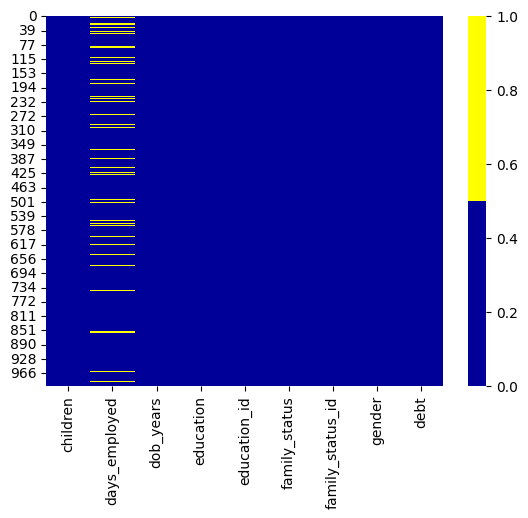

In [29]:
#работа с пропусками данных составление "тепловой карты"
colors = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors));

In [30]:
#работа с пропусками данных обнуление пропусков
df['days_employed'] = df['days_employed']. fillna (0)


In [31]:
df['days_employed']=df.days_employed.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          984 non-null    int64 
 1   days_employed     984 non-null    int64 
 2   dob_years         984 non-null    int64 
 3   education         984 non-null    object
 4   education_id      984 non-null    int64 
 5   family_status     984 non-null    object
 6   family_status_id  984 non-null    int64 
 7   gender            984 non-null    object
 8   debt              984 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 76.9+ KB


In [32]:
#работа с  данными смена отрицательных на положительные
df['days_employed']=df.days_employed.abs() 

In [33]:
def missing_summary_table(df):
  miss_df = pd.concat([df.isna().sum().to_frame(name = '1'), 
                 np.round(df.isna().mean().to_frame(name = '2')*100, 
                          decimals = 2)],  
                axis = 1).reset_index()
  miss_df.columns = ['Признак', 
               'Количество пропусков', 
               'Процент пропусков']
  miss_df.sort_values(by = 'Количество пропусков', 
                      ascending = False, inplace = True)
  miss_df['Процент пропусков'] = (miss_df['Процент пропусков'].
                                  map('{:,.2f}%'.format))
  return miss_df.style.set_caption('Сводная таблица по пропускам')

In [34]:
#работа с пропусками данных  суммирование количества пропусков
print(df.isna().sum())
print(df.isna().sum().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
debt                0
dtype: int64
0


In [35]:
miss_table = missing_summary_table(df)
miss_table

,Признак,Количество пропусков,Процент пропусков
0,children,0,0.00%
1,days_employed,0,0.00%
2,dob_years,0,0.00%
3,education,0,0.00%
4,education_id,0,0.00%
5,family_status,0,0.00%
6,family_status_id,0,0.00%
7,gender,0,0.00%
8,debt,0,0.00%


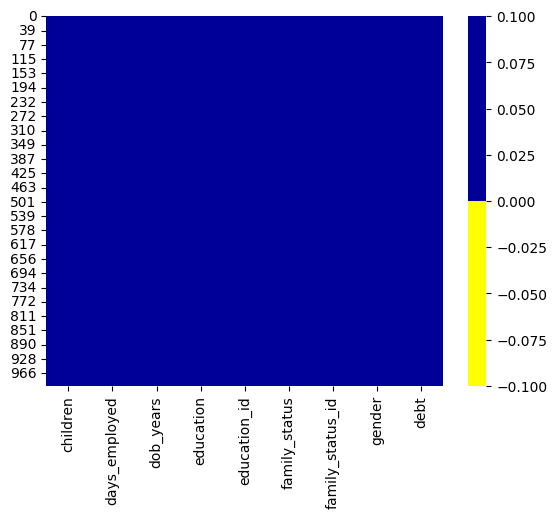

In [36]:
colors = ['#ffff00', '#000099'] # желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors));

In [37]:
# просмотр значений для поиска 
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258,31,высшее,0,женат / замужем,0,M,0
1,0,2639,49,среднее,1,женат / замужем,0,F,0
2,2,109,40,среднее,1,женат / замужем,0,M,0
3,0,0,57,среднее,1,вдовец / вдова,2,F,0
4,0,1309,57,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
995,0,1338,54,среднее,1,женат / замужем,0,F,0
996,1,547,56,среднее,1,вдовец / вдова,2,F,0
997,0,1571,50,среднее,1,в разводе,3,F,0
998,0,340176,62,среднее,1,женат / замужем,0,F,0


In [38]:
#вычисление стажа в днях
df.dob_years = df.dob_years.map(lambda x: ((x - 18)*365)) 
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258,4745,высшее,0,женат / замужем,0,M,0
1,0,2639,11315,среднее,1,женат / замужем,0,F,0
2,2,109,8030,среднее,1,женат / замужем,0,M,0
3,0,0,14235,среднее,1,вдовец / вдова,2,F,0
4,0,1309,14235,среднее,1,гражданский брак,1,F,0
5,1,3710,6935,высшее,0,женат / замужем,0,F,0
6,1,2082,7300,высшее,0,не женат / не замужем,4,M,0
7,1,3611,6205,высшее,0,женат / замужем,0,M,0
8,1,341,6205,высшее,0,женат / замужем,0,F,0
9,0,576,10585,среднее,1,женат / замужем,0,M,0


In [39]:
# просмотр значений для поиска 
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.454268,63822.218496,9318.998984,0.771341,1.038618,0.077236
std,0.734239,136970.680971,4545.764312,0.559348,1.460407,0.267101
min,0.000000,0.000000,730.000000,0.000000,0.000000,0.000000
25%,0.000000,660.000000,5475.000000,0.000000,0.000000,0.000000
50%,0.000000,1943.000000,9125.000000,1.000000,0.000000,0.000000
75%,1.000000,4912.000000,12866.250000,1.000000,2.000000,0.000000
max,4.000000,401161.000000,20440.000000,3.000000,4.000000,1.000000


In [40]:
# поиск аномальных значений признака `возраст` и удаление 
#  удаляем аномальные (редкие) значения  для категориального (дискретного) признака.
# Идея проста: найти значения признака, встречающиеся в наборе данных очень редко 


#строим частотную таблицу: сколько раз встречается каждое значение признака возраст=0
ser_del = df.days_employed.value_counts()
ser_del

0         95
327        6
1610       3
193        3
2625       2
          ..
2590       1
2746       1
774        1
9148       1
340176     1
Name: days_employed, Length: 837, dtype: int64

In [41]:
#удаляем строки с аномальными значениями "стаж"
df_copy = df.loc[df['days_employed'] < 20440]
df_copy

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258,4745,высшее,0,женат / замужем,0,M,0
1,0,2639,11315,среднее,1,женат / замужем,0,F,0
2,2,109,8030,среднее,1,женат / замужем,0,M,0
3,0,0,14235,среднее,1,вдовец / вдова,2,F,0
4,0,1309,14235,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
994,0,1015,1460,среднее,1,гражданский брак,1,M,0
995,0,1338,13140,среднее,1,женат / замужем,0,F,0
996,1,547,13870,среднее,1,вдовец / вдова,2,F,0
997,0,1571,11680,среднее,1,в разводе,3,F,0


In [42]:
#вычисление стажа в годах
df.dob_years = df.dob_years.map(lambda x: ((x + 18)/365))
df.round(decimals=0)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258,13.0,высшее,0,женат / замужем,0,M,0
1,0,2639,31.0,среднее,1,женат / замужем,0,F,0
2,2,109,22.0,среднее,1,женат / замужем,0,M,0
3,0,0,39.0,среднее,1,вдовец / вдова,2,F,0
4,0,1309,39.0,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
995,0,1338,36.0,среднее,1,женат / замужем,0,F,0
996,1,547,38.0,среднее,1,вдовец / вдова,2,F,0
997,0,1571,32.0,среднее,1,в разводе,3,F,0
998,0,340176,44.0,среднее,1,женат / замужем,0,F,0
